## 1. NusTrajectoryExtractor

In [1]:
from pkyutils_ import NusTrajectoryExtractor

import:
pkyutils_


In [2]:
nus = NusTrajectoryExtractor()

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.654 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [3]:
len(nus)  # total samples

404

In [4]:
sample_idx = 50
data = nus.get_trajectory(sample_idx)

In [5]:
_ = [print(i) for i in data.keys()]

ego_pose_xy
ego_pose_rotation
map_masks
map_img
driving_lines
agent_mask
xy_global
xy_local
scene_id


### ego pose

In [6]:
# xy pose in UTM coordinate (m)
print('ego_pose_xy:', data['ego_pose_xy'])

ego_pose_xy: [638.0790843513851, 1619.6123465721505, 0.0]


In [7]:
# quaternian orientation
print('ego_pose_rotation:', data['ego_pose_rotation'])

ego_pose_rotation: [-0.940954152018687, -0.008573445664225235, -0.008068996373892658, 0.33832923480797966]


### map_masks

In [8]:
print(data['map_masks'].shape)

(11, 500, 500, 3)


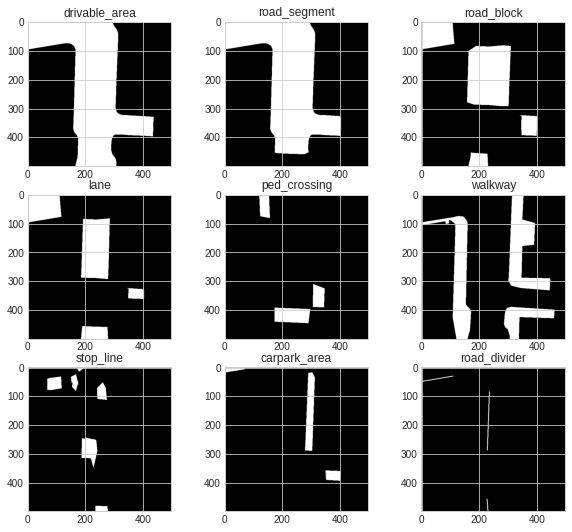

In [9]:
import matplotlib.pyplot as plt

num_labels = len(nus.layer_names)
num_rows = num_labels // 3
fig, ax = plt.subplots(num_rows, 3, figsize=(10, 3 * num_rows))
for row in range(num_rows):
    for col in range(3):
        num = 3 * row + col
        if num == num_labels - 1:
            break
        ax[row][col].set_title(nus.layer_names[num])
        ax[row][col].imshow(data['map_masks'][num])
plt.show()

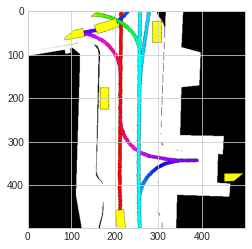

In [10]:
data['map_img']

import matplotlib.pyplot as plt
plt.imshow(data['map_img'])
plt.show()

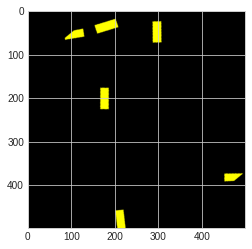

In [11]:
data['agent_mask']

import matplotlib.pyplot as plt
plt.imshow(data['agent_mask'])
plt.show()

In [12]:
data['driving_lines']

len(data['driving_lines'].keys())

44

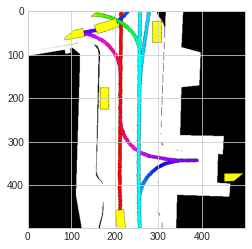

In [13]:
from rasterization_q10.input_representation.combinators import Rasterizer

combinator = Rasterizer()

images = [data['map_img'], data['agent_mask']]
image = combinator.combine(images)

import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [14]:
image.shape

(500, 500, 3)

In [15]:
data['xy_global']

data['xy_global'][0][2], data['xy_global'][2][2], data['xy_global'][1][2]

([[659.996, 1613.483],
  [659.91, 1613.29],
  [659.825, 1613.097],
  [659.578, 1612.577],
  [659.368, 1612.042],
  [659.243, 1611.678]],
 [659.092, 1611.324],
 [[659.03, 1610.983],
  [658.977, 1610.64],
  [658.745, 1609.74],
  [658.541, 1608.833],
  [658.362, 1607.039],
  [658.497, 1605.242]])

In [16]:
data['xy_local']

data['xy_local'][0][2], data['xy_local'][2][2], data['xy_local'][1][2]

([[-9.228264343670322, 20.80286562359566],
  [-9.024684077904489, 20.859434832452674],
  [-8.821740518604503, 20.916775147577674],
  [-8.263498762237699, 21.057399261614073],
  [-7.717248551086467, 21.23610490455041],
  [-7.3569775613412975, 21.37147777460898]],
 [-6.987863266164477, 21.48043481704392],
 [[-6.685440227925997, 21.64974313326817],
  [-6.3872053353440315, 21.827264818835083],
  [-5.545493794156069, 22.221403983891207],
  [-4.7162122901350045, 22.64159106970942],
  [-3.218877188117178, 23.645814447382758],
  [-1.9191545975542965, 24.89407531257905]])

In [17]:
data['scene_id']

50

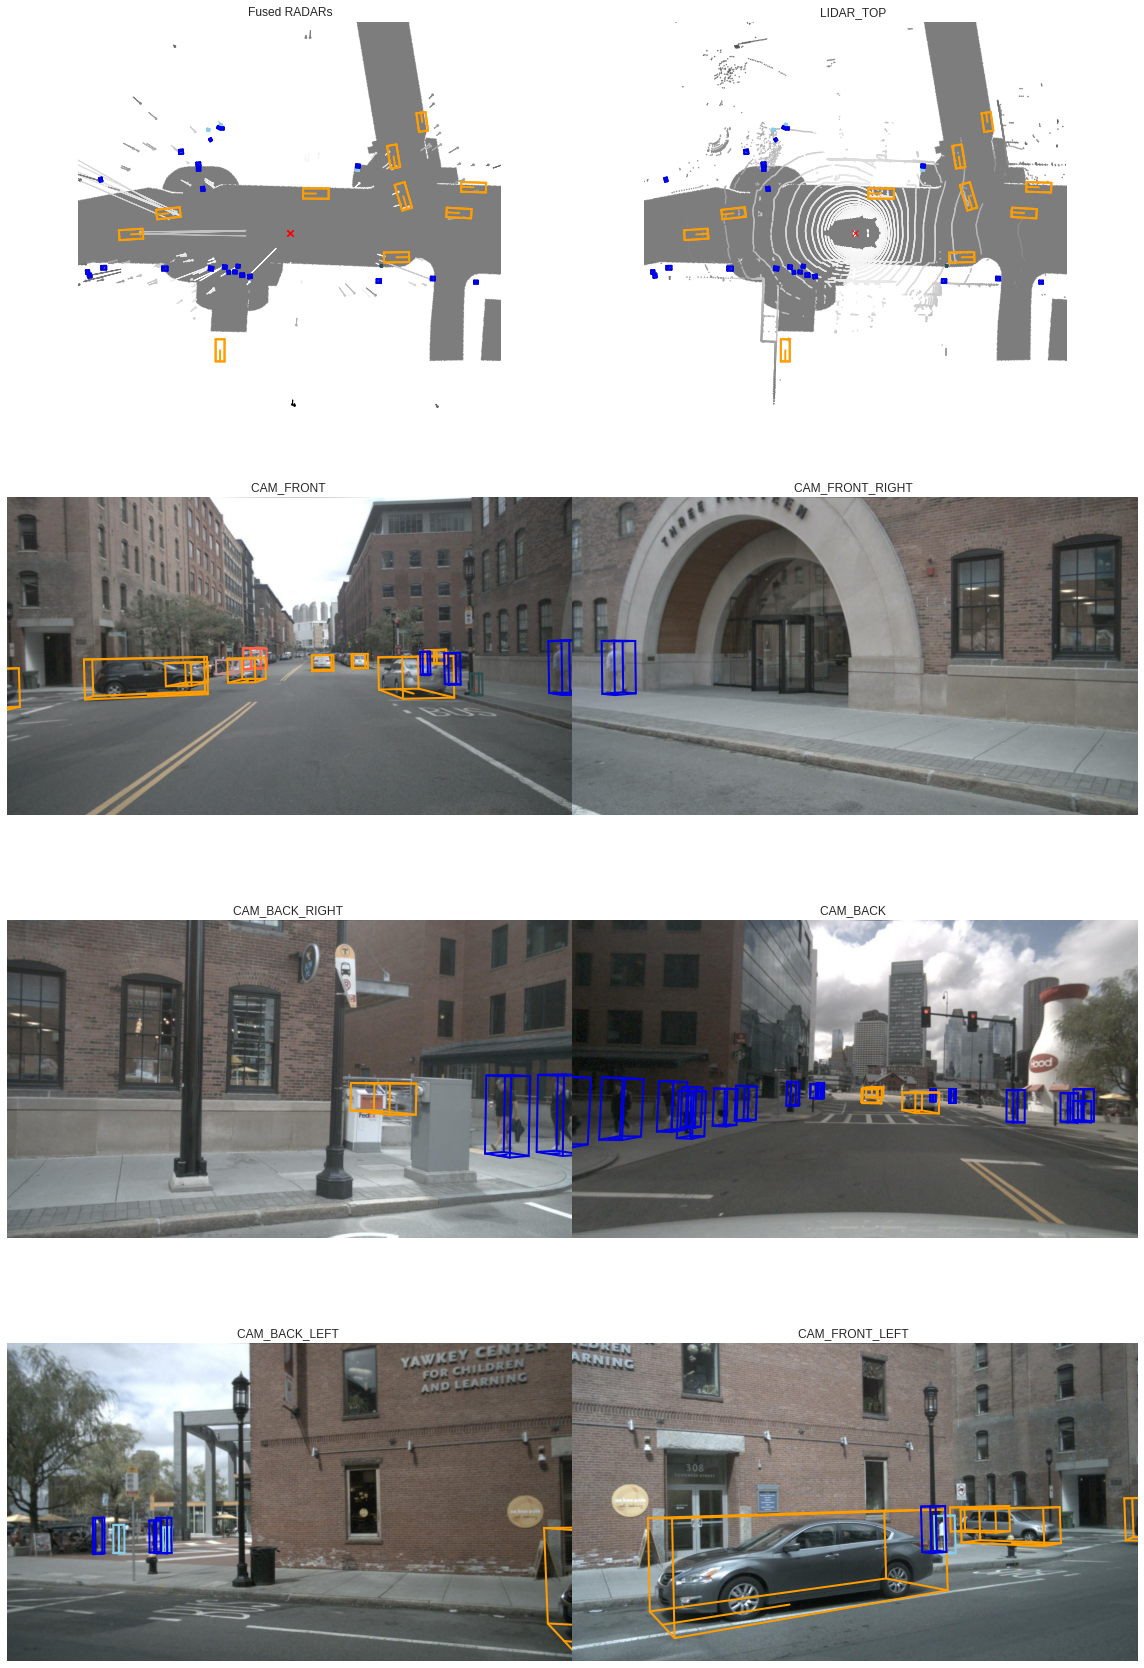

In [18]:
nus.render_sample(sample_idx)

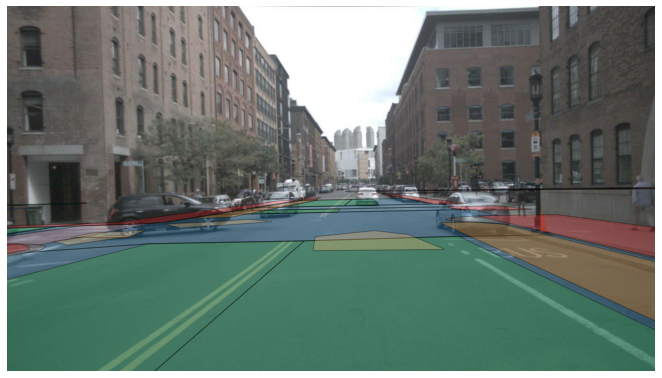

In [19]:
nus.render_scene(sample_idx)

In [ ]:
from pkyutils_ import NusTrajectoryExtractor
nus = NusTrajectoryExtractor(root='/datasets/nuscene/zip/v1.0-trainval01_blobs', version='v1.0-trainval')

nus.render_sample(34)

import:
pkyutils_
Loading NuScenes tables for version v1.0-trainval...


In [31]:
a = [[0., 1.]] * 4

In [36]:
a[:-2]

[[0.0, 1.0], [0.0, 1.0]]

In [41]:
a = [1,2,3,4,5,6,7,8,9]
a[-5:]

[5, 6, 7, 8, 9]

In [42]:
a.append([1,2])
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, [1, 2]]

In [2]:
from nuscenes import NuScenes
from rasterization_q10 import PredictHelper
from nuscenes.eval.prediction.splits import get_prediction_challenge_split

root='/datasets/nuscene/v1.0-mini'

sampling_time=3
agent_time=0
layer_names=None
colors=None
resolution = 0.1
meters_ahead = 25.
meters_behind = 25.
meters_left = 25.
meters_right = 25.

version='v1.0-mini'
split='mini_train'

'''
split: {'mini_train', 'mini_val', 'train', 'train_val', 'val'}
'''

nus = NuScenes(version, dataroot=root)
helper = PredictHelper(nus)
dataset = get_prediction_challenge_split(split, dataroot=root)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.498 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [3]:
idx = 10
instance_token, sample_token = dataset[idx].split('_')
ego_pose = helper.get_sample_annotation(instance_token, sample_token)

In [4]:
instance_token

'a60047adc78a4b6895702e86b6d2fe88'

In [16]:
dataset1 = get_prediction_challenge_split('train', dataroot=root)
dataset2 = get_prediction_challenge_split('train_val', dataroot=root)

In [19]:
len(dataset1)

32186

In [20]:
len(dataset2)

8560

In [5]:
dataset

['bc38961ca0ac4b14ab90e547ba79fbb6_39586f9d59004284a7114a68825e8eec',
 'bc38961ca0ac4b14ab90e547ba79fbb6_356d81f38dd9473ba590f39e266f54e5',
 'bc38961ca0ac4b14ab90e547ba79fbb6_e0845f5322254dafadbbed75aaa07969',
 'bc38961ca0ac4b14ab90e547ba79fbb6_c923fe08b2ff4e27975d2bf30934383b',
 'bc38961ca0ac4b14ab90e547ba79fbb6_f1e3d9d08f044c439ce86a2d6fcca57b',
 'bc38961ca0ac4b14ab90e547ba79fbb6_4f545737bf3347fbbc9af60b0be9a963',
 'bc38961ca0ac4b14ab90e547ba79fbb6_7626dde27d604ac28a0240bdd54eba7a',
 'bc38961ca0ac4b14ab90e547ba79fbb6_be99ffc878b24aca8956bbb4e0f97d0c',
 'bc38961ca0ac4b14ab90e547ba79fbb6_9813c23a5f1448b09bb7910fea9baf20',
 'bc38961ca0ac4b14ab90e547ba79fbb6_023c4df2d451409881d8e6ea82f14704',
 'a60047adc78a4b6895702e86b6d2fe88_39586f9d59004284a7114a68825e8eec',
 'a60047adc78a4b6895702e86b6d2fe88_356d81f38dd9473ba590f39e266f54e5',
 'a60047adc78a4b6895702e86b6d2fe88_e0845f5322254dafadbbed75aaa07969',
 'a60047adc78a4b6895702e86b6d2fe88_c923fe08b2ff4e27975d2bf30934383b',
 'a60047adc78a4b6895

In [24]:
tokens = {}

for data in dataset:
    instance_token, sample_token = data.split('_')
    try:
        tokens[sample_token].append(instance_token)
    except:
        tokens[sample_token] = [instance_token]

In [14]:
tokens

{'39586f9d59004284a7114a68825e8eec': ['bc38961ca0ac4b14ab90e547ba79fbb6',
  'a60047adc78a4b6895702e86b6d2fe88',
  'c1958768d48640948f6053d04cffd35b'],
 '356d81f38dd9473ba590f39e266f54e5': ['bc38961ca0ac4b14ab90e547ba79fbb6',
  'a60047adc78a4b6895702e86b6d2fe88',
  'c1958768d48640948f6053d04cffd35b'],
 'e0845f5322254dafadbbed75aaa07969': ['bc38961ca0ac4b14ab90e547ba79fbb6',
  'a60047adc78a4b6895702e86b6d2fe88',
  'c1958768d48640948f6053d04cffd35b'],
 'c923fe08b2ff4e27975d2bf30934383b': ['bc38961ca0ac4b14ab90e547ba79fbb6',
  'a60047adc78a4b6895702e86b6d2fe88',
  'c1958768d48640948f6053d04cffd35b'],
 'f1e3d9d08f044c439ce86a2d6fcca57b': ['bc38961ca0ac4b14ab90e547ba79fbb6',
  'a60047adc78a4b6895702e86b6d2fe88',
  'c1958768d48640948f6053d04cffd35b'],
 '4f545737bf3347fbbc9af60b0be9a963': ['bc38961ca0ac4b14ab90e547ba79fbb6',
  'a60047adc78a4b6895702e86b6d2fe88',
  'c1958768d48640948f6053d04cffd35b'],
 '7626dde27d604ac28a0240bdd54eba7a': ['bc38961ca0ac4b14ab90e547ba79fbb6',
  'a60047adc78a4b689

In [23]:
tokens

{}

In [26]:
for sample_token, instance_tokens in tokens.items():
    print(sample_token, instance_tokens)

39586f9d59004284a7114a68825e8eec ['bc38961ca0ac4b14ab90e547ba79fbb6', 'a60047adc78a4b6895702e86b6d2fe88', 'c1958768d48640948f6053d04cffd35b']
356d81f38dd9473ba590f39e266f54e5 ['bc38961ca0ac4b14ab90e547ba79fbb6', 'a60047adc78a4b6895702e86b6d2fe88', 'c1958768d48640948f6053d04cffd35b']
e0845f5322254dafadbbed75aaa07969 ['bc38961ca0ac4b14ab90e547ba79fbb6', 'a60047adc78a4b6895702e86b6d2fe88', 'c1958768d48640948f6053d04cffd35b']
c923fe08b2ff4e27975d2bf30934383b ['bc38961ca0ac4b14ab90e547ba79fbb6', 'a60047adc78a4b6895702e86b6d2fe88', 'c1958768d48640948f6053d04cffd35b']
f1e3d9d08f044c439ce86a2d6fcca57b ['bc38961ca0ac4b14ab90e547ba79fbb6', 'a60047adc78a4b6895702e86b6d2fe88', 'c1958768d48640948f6053d04cffd35b']
4f545737bf3347fbbc9af60b0be9a963 ['bc38961ca0ac4b14ab90e547ba79fbb6', 'a60047adc78a4b6895702e86b6d2fe88', 'c1958768d48640948f6053d04cffd35b']
7626dde27d604ac28a0240bdd54eba7a ['bc38961ca0ac4b14ab90e547ba79fbb6', 'a60047adc78a4b6895702e86b6d2fe88', 'c1958768d48640948f6053d04cffd35b']
be99ff

In [10]:
a = [1, 2, 3, 4, 5]
mask = [True, False, False, True, True]

a[mask]

TypeError: list indices must be integers or slices, not list

In [11]:
a[-9:]

[1, 2, 3, 4, 5]

In [12]:
c = []

c[-4:]

[]

In [ ]:
from pkyutils_ import NusTrajectoryExtractor

nus = NusTrajectoryExtractor()

In [1]:
from pkyutils_ import NusTrajectoryExtractor

DATAROOT='/datasets/nuscene/v1.0-mini'
nus = NusTrajectoryExtractor(root=DATAROOT, version='v1.0-mini')

import:
pkyutils_
Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.391 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [2]:
nus.save_cmu_dataset(save_dir='../cmu_dataset')

split dataset:  40%|████      | 2/5 [20:03<30:05, 601.89s/it]


KeyError: ('faf2ea71b30941329a3c3f3866cec714', '4d87aaf2d82549969f1550607ef46a63')

In [7]:
a = {'a': 1, 'b': 2, 'c':3}

list(a.keys())[0]

'a'

In [16]:
import numpy as np

asdf = list(a.keys())
np.random.shuffle(asdf)
asdf

['a', 'b', 'c']

In [19]:
np.arccos(3)

/home/q10/.pyenv/versions/intelpro/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


nan

In [23]:
a = [0., 0.]
b = [1., 1.]

np.clip(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)), -1.0, 1.0)

/home/q10/.pyenv/versions/intelpro/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


nan

In [25]:
np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

/home/q10/.pyenv/versions/intelpro/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

In [26]:
np.dot(a, b)

0.0

In [27]:
(np.linalg.norm(a) * np.linalg.norm(b))

0.0

In [28]:
asdf = [True, False, True, True, True]
np.sum(asdf)

4

In [11]:
from pkyutils_ import NusCustomDataset

dataset = NusCustomDataset(load_dir='../nus_dataset/cmu_dataset', split='mini_train', shuffle=False, min_angle=None, max_angle=None)


total samples: 187
total agents (to decode): 359
average curvature: -0.591829636894064 deg.
average speed: 5.242682051724221m
average future distance: 20.338468317724633m
average number of agents per scene: 1.9197860962566844


In [16]:
dataset[8]

([[[22.10456170076287, -14.828637294679634],
   [22.093984580540095, -14.786021282104826],
   [22.015477003449856, -14.8091202071753],
   [21.936008790922468, -14.831941320156691]],
  [[-5.219638721765497, 31.71867033175013],
   [-5.219638721765497, 31.71867033175013],
   [-5.219638721765497, 31.71867033175013],
   [-5.219638721765497, 31.71867033175013]],
  [[-9.735731896105714, 7.139757450162444],
   [-9.735731896105714, 7.139757450162444],
   [-9.735731896105714, 7.139757450162444],
   [-9.735731896105714, 7.139757450162444]],
  [[4.9734402144535395, -17.63903470809138],
   [7.016092490607572, -15.219254619173565],
   [8.941537784668121, -13.024782149631271],
   [11.294518981589006, -10.766575452506931]],
  [[10.248876065850428, 14.673348267755312],
   [10.248876065850428, 14.673348267755312],
   [10.248876065850428, 14.673348267755312],
   [10.248876065850428, 14.673348267755312]],
  [[2.384405137273797, 10.833020545597913],
   [2.384405137273797, 10.833020545597913],
   [2.3844051

In [13]:
for i in range(1, len(dataset)):
    print(i)
    a = dataset[i]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186


전체 episodes: 187, 에이전트 개수: 359
episode 당 평균 에이전트 개수: 1.92
평균 경로 곡률: -0.59 (Deg)


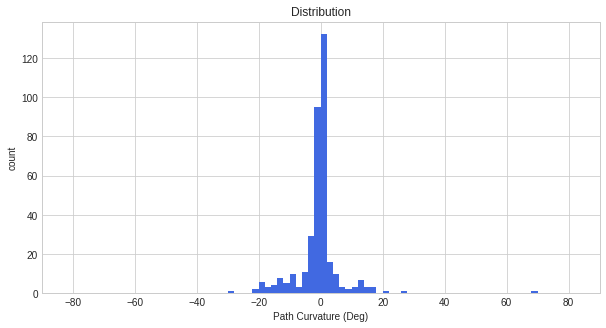

In [14]:
dataset.show_distribution()

전체 episodes: 187, 에이전트 개수: 359
episode 당 평균 에이전트 개수: 1.92
평균 에이전트 속도: 5.24 (m/s)


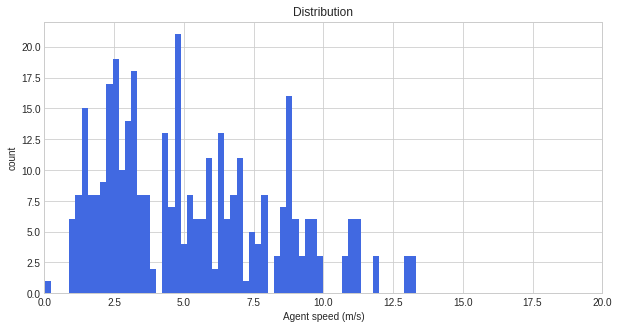

In [15]:
dataset.show_speed_distribution()

[False, False, True, False, False, False, False, True, True]


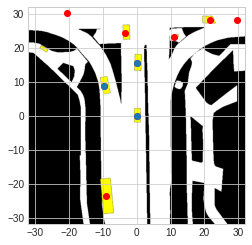

[False, False, True, False, False, False, True, True]


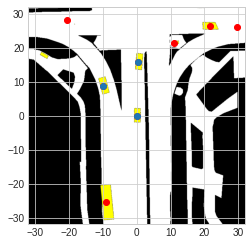

[False, False, False, True, False, False, False, False, True, True, False]


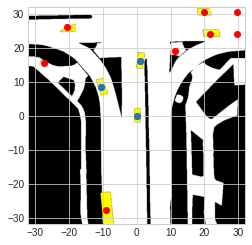

[False, False, False, True, False, False, False, False, False, True, True, False, False]


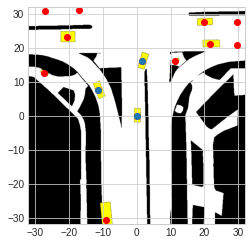

[False, False, False, True, False, False, False, False, True, True, False, False, False, False]


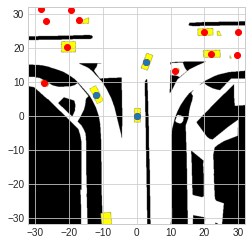

[False, False, False, True, False, False, False, False, True, True, False, False, False, False]


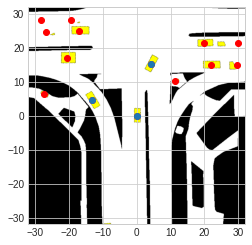

[False, False, False, False, True, False, False, False, False, True, True, False, False, False, False]


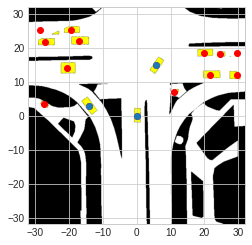

[False, False, False, False, False, False, False, True, False, False, False]


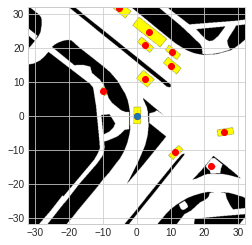

[False, False, False, False, False, False, False, False, True, False, False, False]


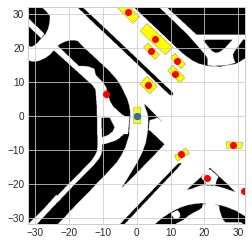

[False, False, False, False, False, False, False, False, True, False, False, False]


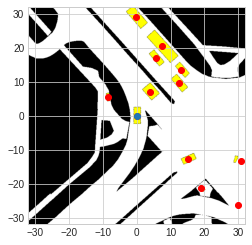

[False, False, False, False, False, False, False, True, False, False, False, False]


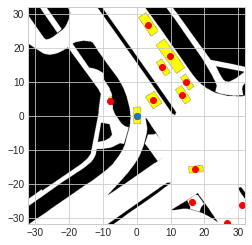

[False, False, False, False, False, False, False, True, False, False, False, False]


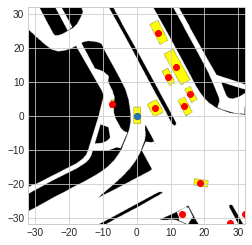

[False, False, False, False, False, True, False, False, False]


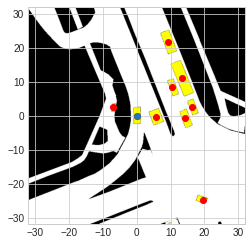

[False, False, False, False, False, True, False, False, False]


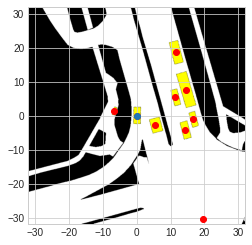

[False, False, False, False, True, False, False, False]


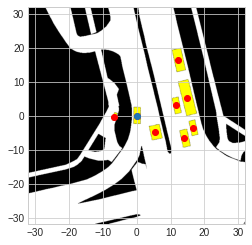

[False, False, False, False, True, False, False, False]


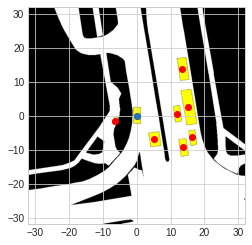

[False, False, False, False, True, False, False, False]


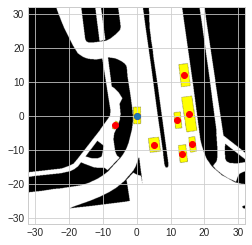

[False, False, False, False, True, False, False, False]


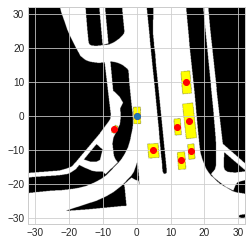

[False, False, False, False, True, False, False, False]


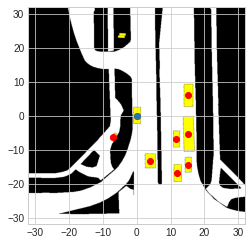

[False, False, False, False, True, False, False, False]


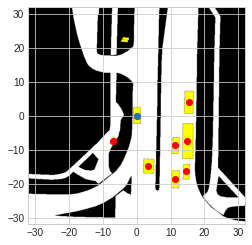

[False, False, False, False, False, True, False, False, False]


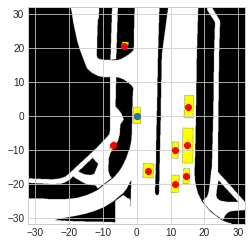

[False, True, False]


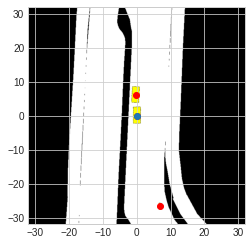

[False, True, False]


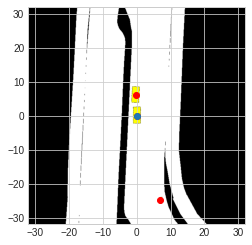

[False, True, False, False]


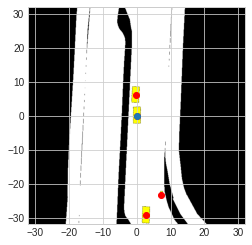

[False, True, False, False]


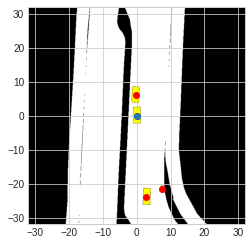

[False, True, False, False]


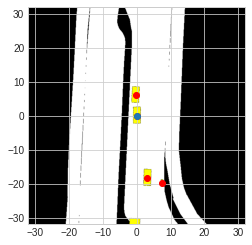

[False, True, False, False, False]


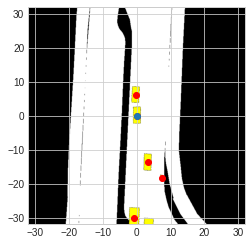

[False, True, False, False, False, False]


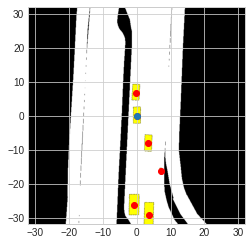

[False, True, False, False, False, False]


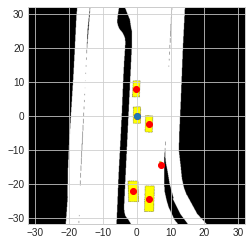

[False, True, False, False, False, False]


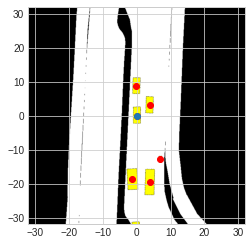

[True, False, False, False, True, False, False, False]


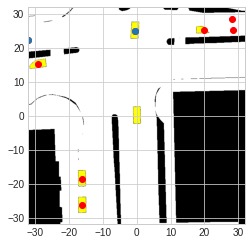

[False, False, False, True, False, False, False]


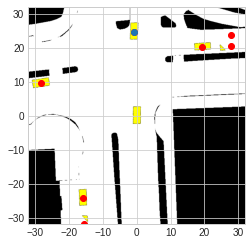

[True, False, False, False, True, False, False]


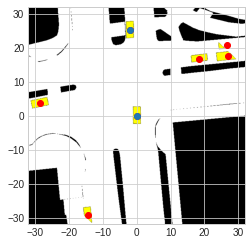

[True, True, False, False, False, True, False, False, False]


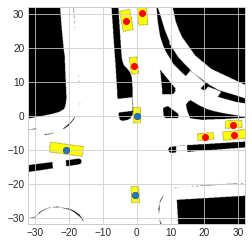

[False, True, False]


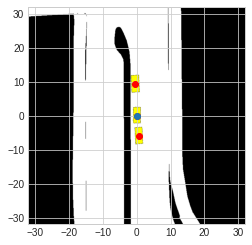

[True, False, True, False, True]


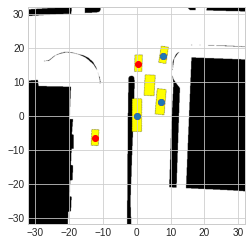

[True, False, True, True, False, True]


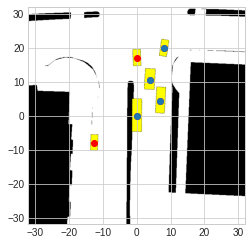

[True, False, True, True, False, True, False]


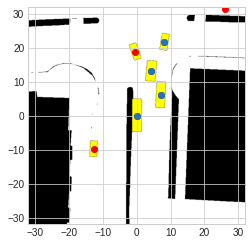

[True, False, False, True, False, True, False]


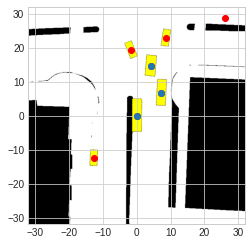

[True, False, False, True, False, True, False]


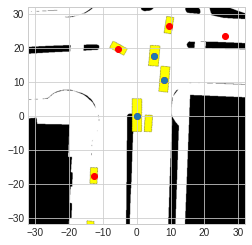

[True, False, False, True, False, True, False]


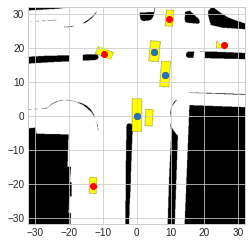

[False, True, True, True, False, False]


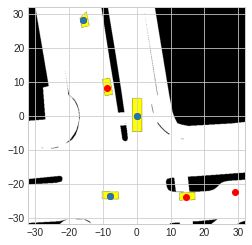

[False, True, True, True, False, False]


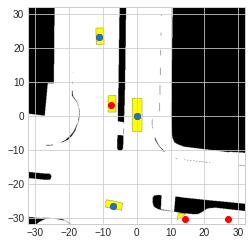

[True, True, False]


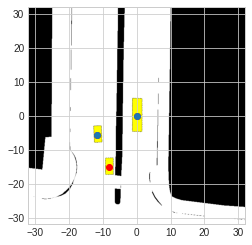

[True, False, False]


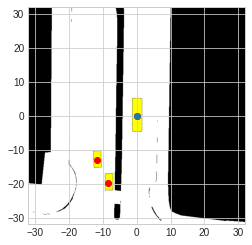

[False, False, False, False, False, True, False, False, False]


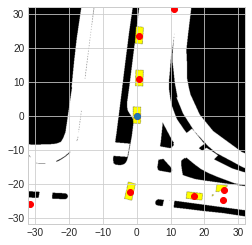

[False, False, False, False, False, True, False, False, False]


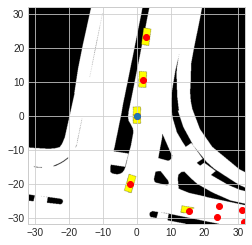

[False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


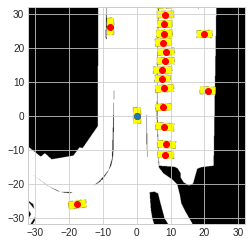

[False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


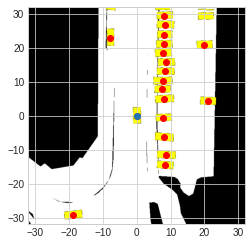

[False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]


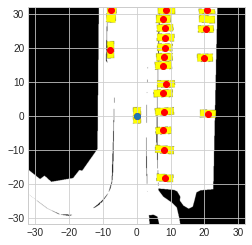

[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]


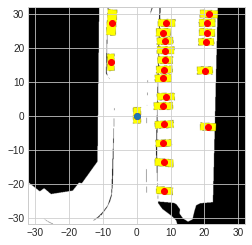

[False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


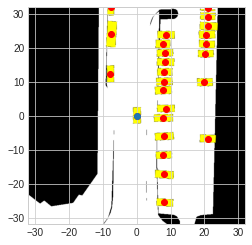

[False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


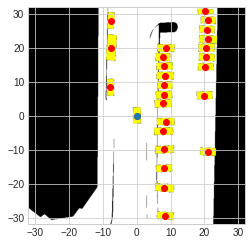

[False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


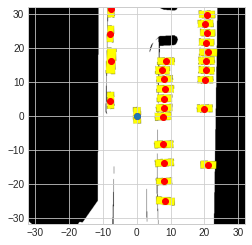

[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


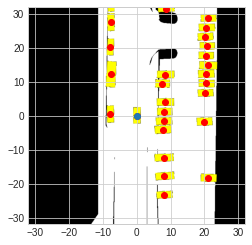

[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


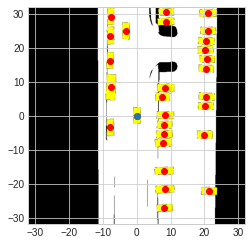

[False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


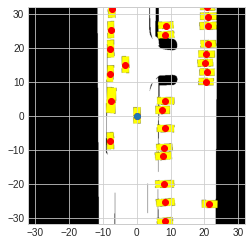

[False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


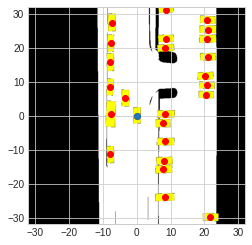

[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


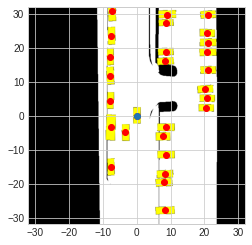

[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


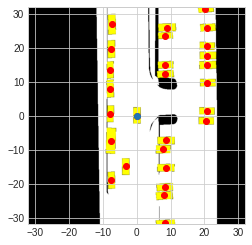

[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


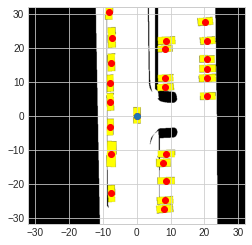

[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


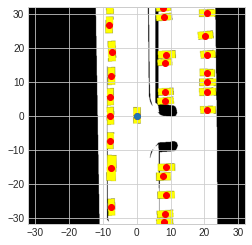

[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


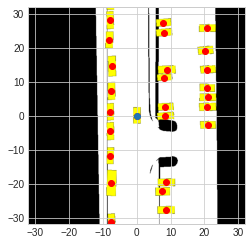

[False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


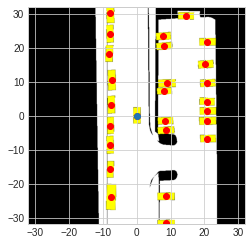

[False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]


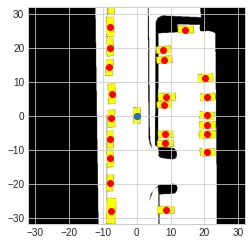

[False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


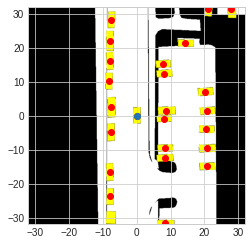

[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]


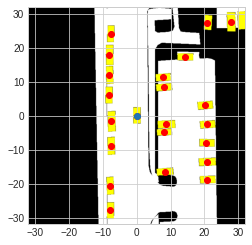

[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]


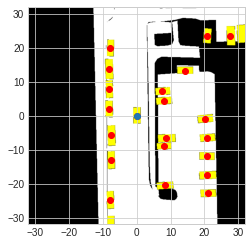

[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]


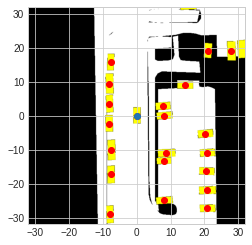

[False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


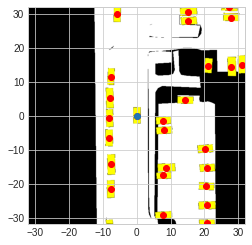

[True, False, True, False, False, False]


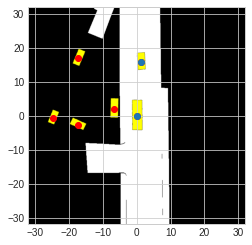

[True, False, True, False, False, False]


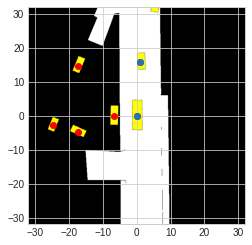

[True, False, True, False, False, False, False]


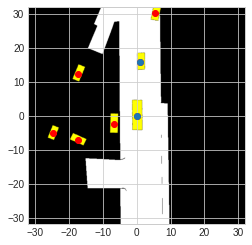

[True, False, True, False, False, False, False]


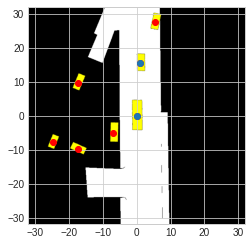

[True, False, True, False, False, False, False]


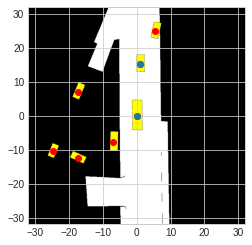

[True, False, True, False, False, False, False]


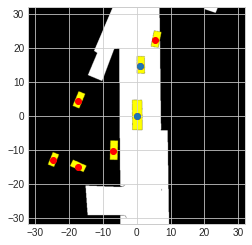

[True, False, True, False, False, False, False]


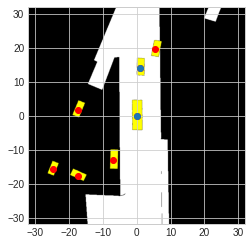

[True, False, True, False, False, False, False]


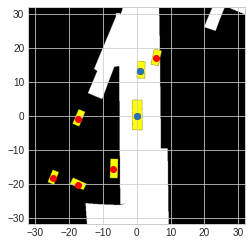

[True, False, True, False, False, False, False]


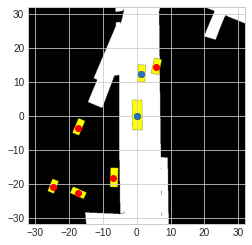

[True, False, True, False, False, False, False]


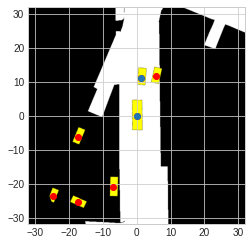

[True, False, True, False, False, False]


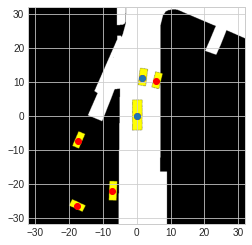

[True, False, True, False, False, False]


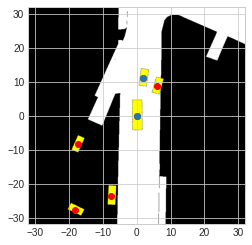

[True, False, False, False, False, False]


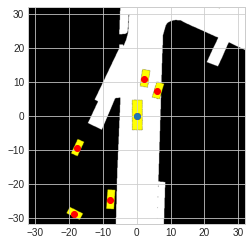

[False, True, False, False, False, False, False, False]


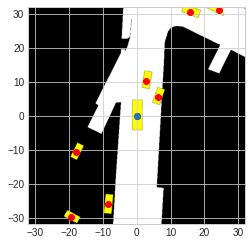

[False, True, False, False, False, False, False, False]


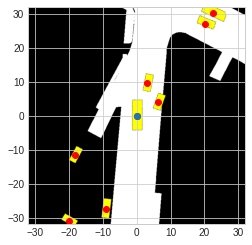

[False, True, False, False, False, False, False, False]


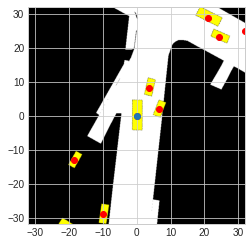

[False, True, False, False, False, False, False, False, False]


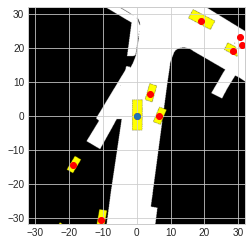

[True, False, False, False, False, False, False]


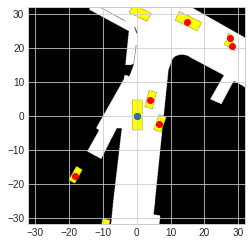

[True, False, False, False, False, False, False, False]


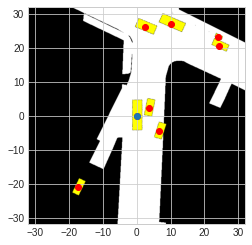

[True, False, False, False, False, False, False, False]


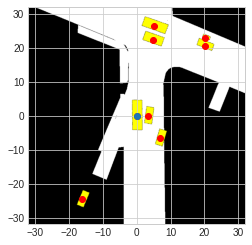

[True, False, False, False, False, False, False, False]


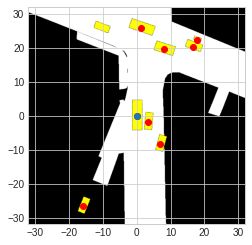

[False, True, False, True, False]


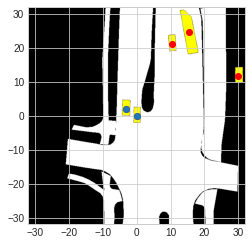

[False, True, False, True, False, False, False]


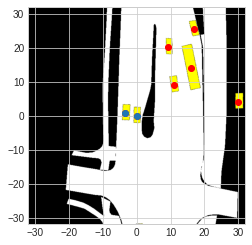

[True, False, True, False, False, False]


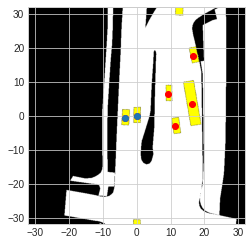

[False, True, False, True, False, False, False, True]


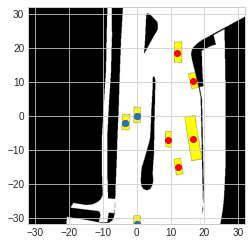

[False, True, False, True, False, False, False, True]


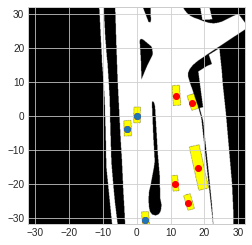

[False, True, False, True, False, True]


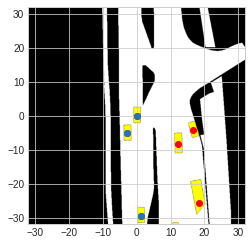

[False, True, True, False, True]


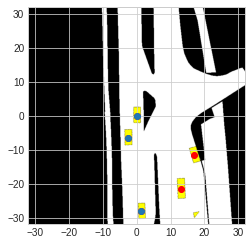

[True, True, False, True]


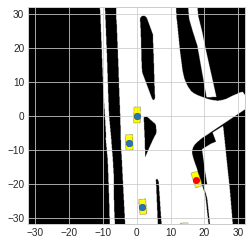

[True, True, False, True]


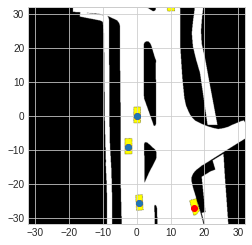

[False, False, True, True, True]


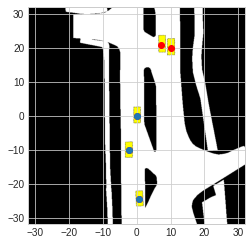

[False, False, False, True, False, True, True]


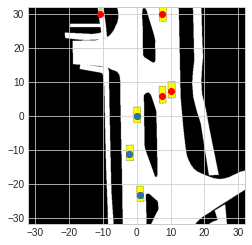

[False, False, False, True, False, True, False, True]


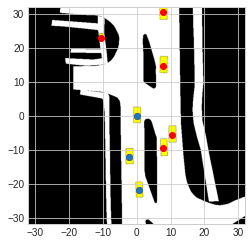

[False, False, False, True, False, True, False, False, True]


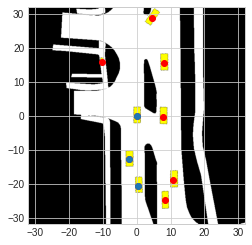

[False, False, True, False, True, False, False, True]


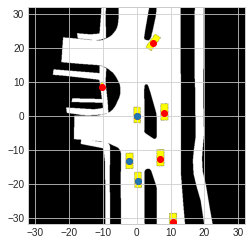

[False, True, False, True, False, False, True]


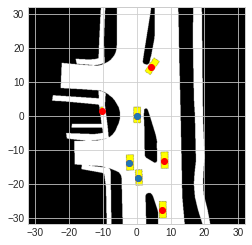

[False, True, True, False, False, True]


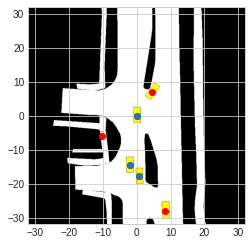

[False, True, True, False, True]


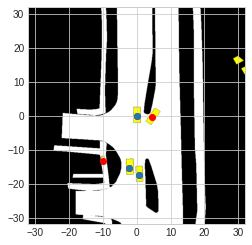

[False, True, True, False, False, True]


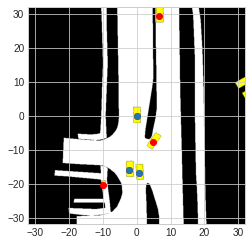

[False, True, True, False, False, True]


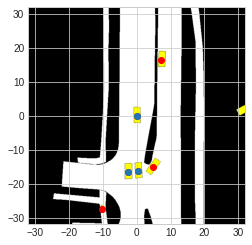

[False, True, False, True, False, False, True]


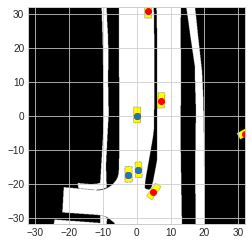

[True, False, True, False, False, True]


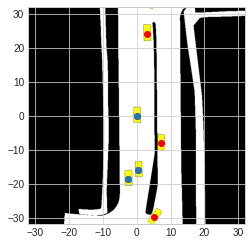

[False, True, True, False, True, False, True]


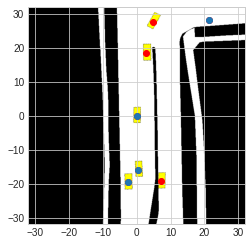

[False, True, False, False, True, False, False, True]


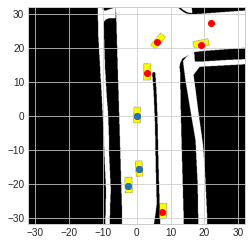

[False, True, False, False, True, False, True]


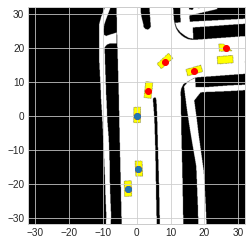

[True]


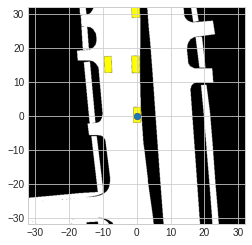

[True, True]


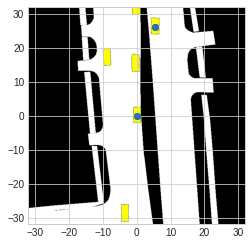

[True, True, True]


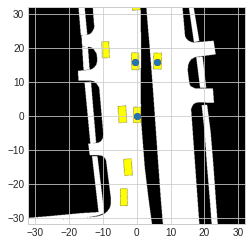

[True, True, True, False]


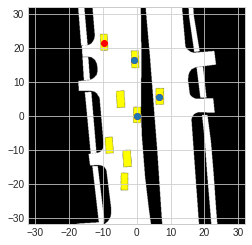

[True, True, True, True, False]


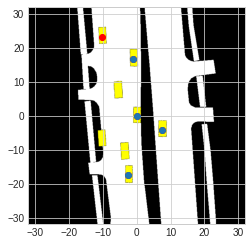

[True, True]


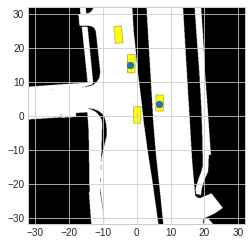

[False, False, True]


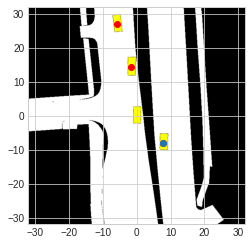

[True, False, False, True]


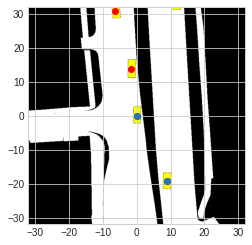

[True, False, True, True]


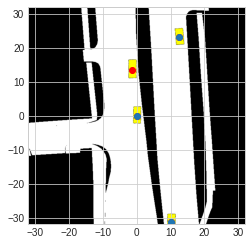

[True]


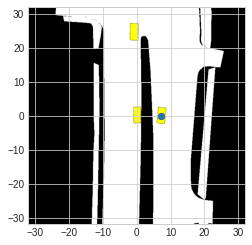

[True, True]


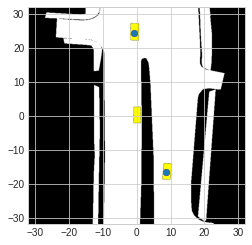

[True, True, True]


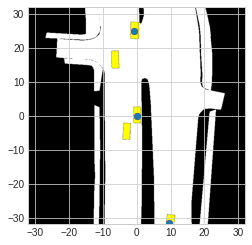

[False, True]


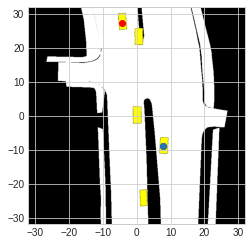

[True]


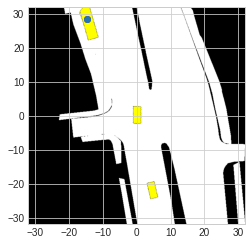

[True, True]


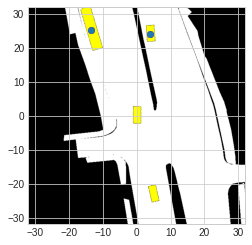

[True, True, True]


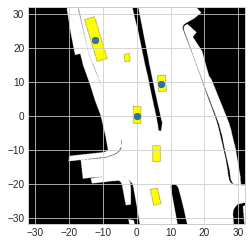

[True, True, True, False]


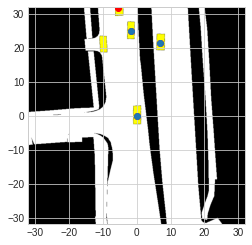

[True, True, True]


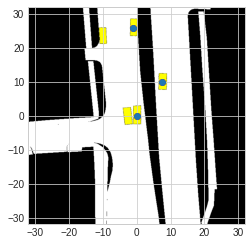

[True, True, True]


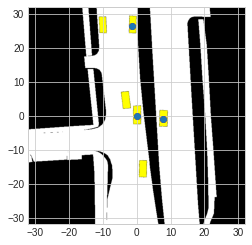

[False, True, False]


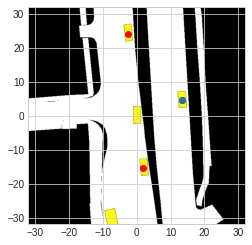

[False, False, True]


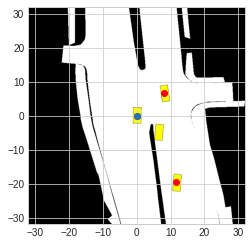

[False, True, True]


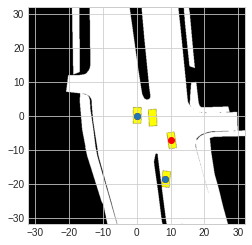

[False, True]


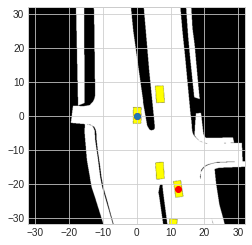

[False, True, False, True, False, True, False]


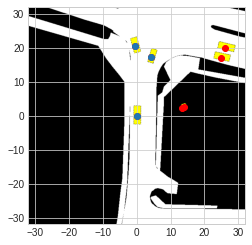

[False, True, False, True, False, True, False]


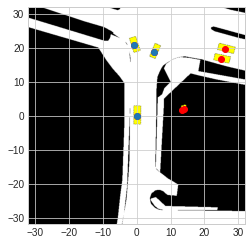

[False, True, False, True, False, True, False]


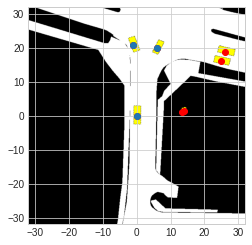

[False, True, False, True, False, True, False]


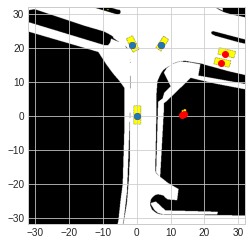

[False, False, True, False, True, False, True, False]


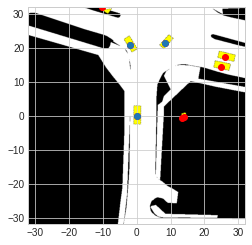

[False, False, True, False, True, False, True, False]


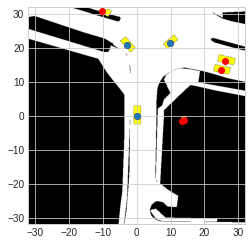

[False, False, True, False, True, False, True, False]


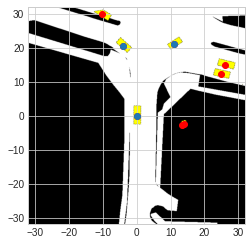

[False, False, True, False, True, False, False, False, False]


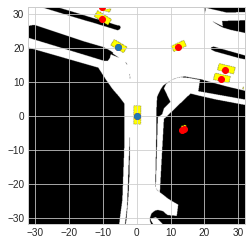

[False, False, True, False, True, False, False, False, False]


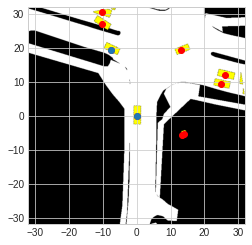

[False, False, True, False, True, False, False, False, False, False, False]


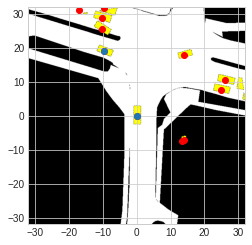

[False, False, False, True, False, True, False, False, False, False, False, False, False]


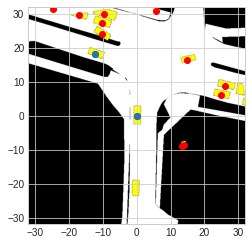

[False, False, False, True, False, True, False, False, False, False, False, False, False]


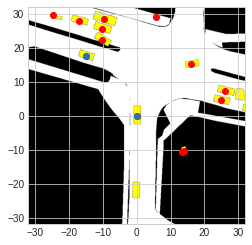

[False, False, False, True, False, True, False, False, False, False, False, False, False]


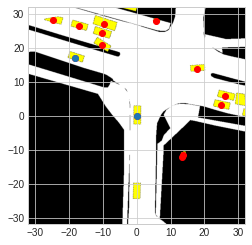

[False, False, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False]


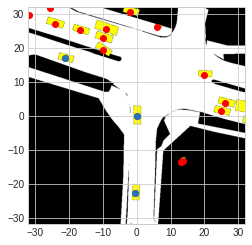

[False, False, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False]


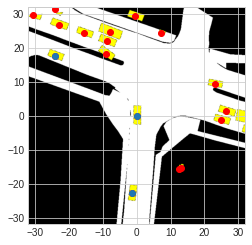

[False, False, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False]


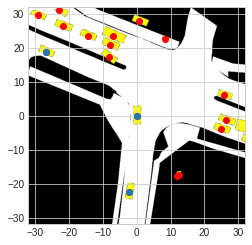

[False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False]


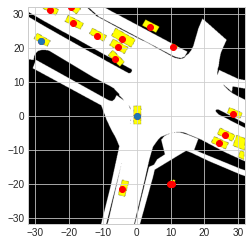

[False, False, False, True, False, True, False, False, False, False, False, False, False, False, False]


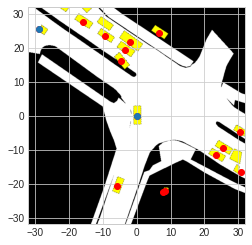

[False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False]


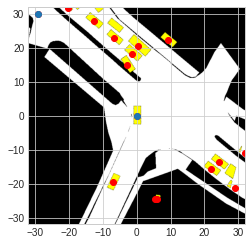

[False, False, False, True, False, False, False, False, False, False, False, False, False, False, False]


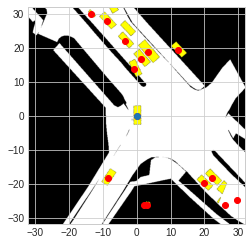

[False, False, False, True, False, False, False, False, False, False, False, False, False, False, False]


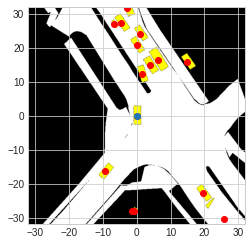

[False, False, False, True, False, False, False, False, False, False, False, False, False, False]


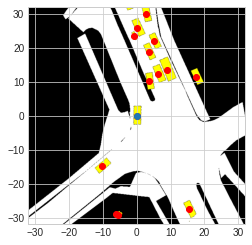

[False, False, False, True, False, False, False, False, False, False, False, False, False, False, False]


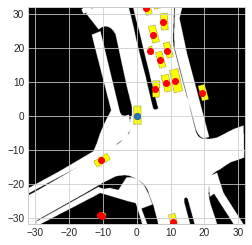

[False, False, False, True, False, False, False, False, False, False, False, False, False]


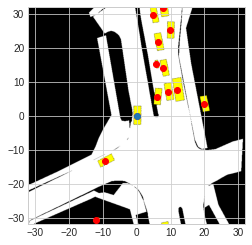

[False, False, True, False, False, False, False, False, False, False, False]


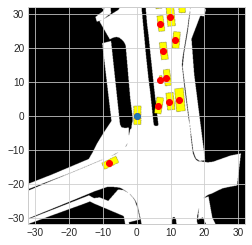

[True, False, True, False, False]


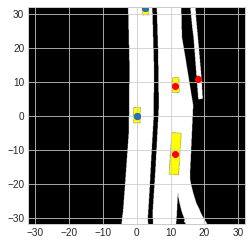

[True, True, True, False, False]


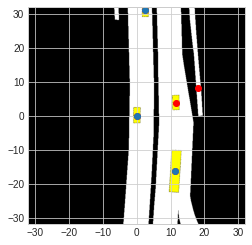

[True, True, True, False, False]


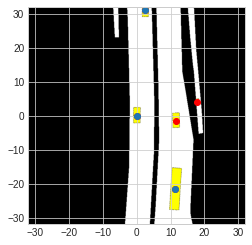

[True, True, False, False, True]


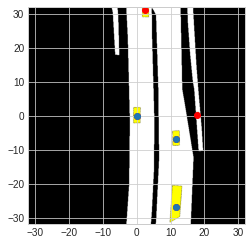

[True, False, False, False, False, True]


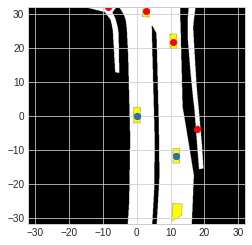

[True, False, False, False, False, True]


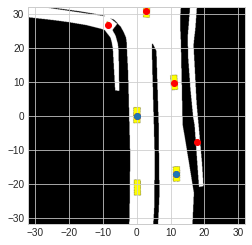

[True, False, False, False, False, True, True]


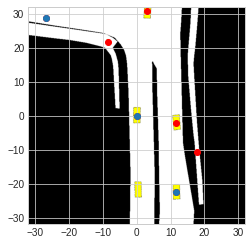

[True, False, False, False, False, False, True, True]


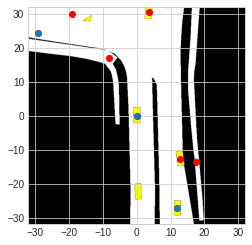

[True, False, False, False, False, False, True, False, False, False]


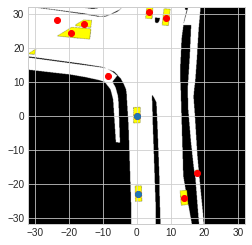

[True, False, False, False, False, True, False, False, False]


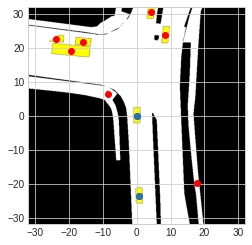

[True, False, False, False, False, True, False, False, False]


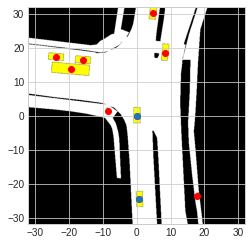

[True, False, False, False, False, True, False, False, False]


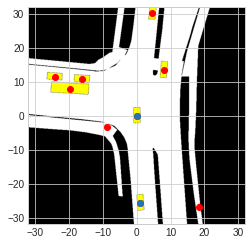

[True, False, False, False, False, True, False, False, False]


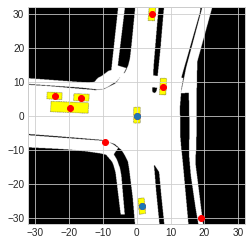

[True, False, False, False, False, True, False, False]


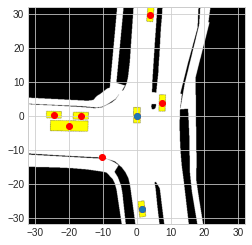

[True, False, False, False, False, True, False, False]


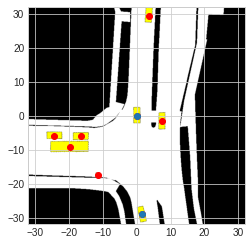

[True, False, False, False, False, True, False, False]


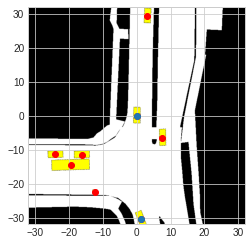

[True, False, False, False, False, False]


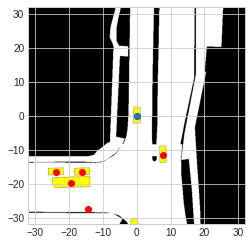

[True, False, False, False, False]


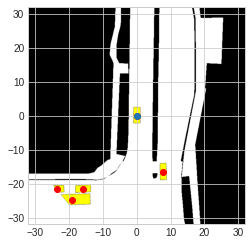

[True, False, False, False, False]


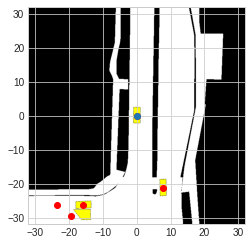

[True, False, False]


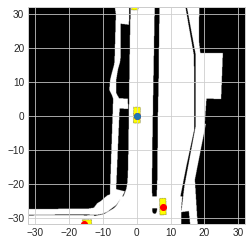

[False, False, False, False, True, False, False, False]


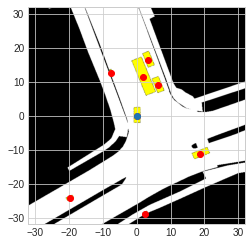

[False, False, False, False, True, False, False, False]


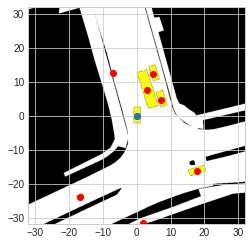

[False, False, False, False, True, False, False]


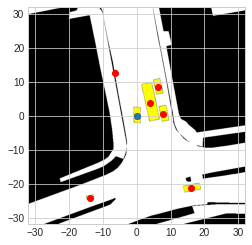

In [23]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(1, len(dataset)):
    print(dataset[i][4])
    mask = dataset[i][4]
    pose = np.array(dataset[i][6])[mask]
    pose_all = np.array(dataset[i][6])
    plt.imshow(dataset.get_scene_image(i), extent=[-32, 32, -32, 32])
    plt.scatter(pose_all[:, 0], pose_all[:, 1], color='r')
    plt.scatter(pose[:, 0], pose[:, 1])
    plt.show()




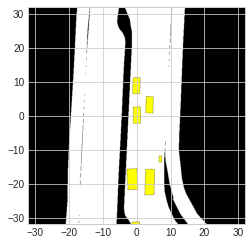

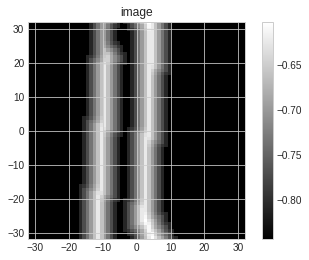

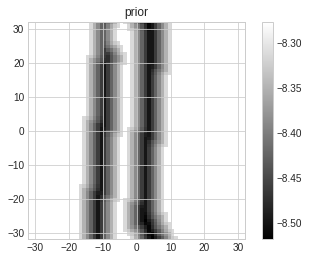

In [35]:
idx = 30

plt.imshow(dataset.get_scene_image(idx), extent=[-32, 32, -32, 32])
plt.show()

plt.title('image')
plt.imshow(dataset[idx][7][0], cmap='gray', extent=[-32, 32, -32, 32])
plt.colorbar()
plt.show()

plt.title('prior')
plt.imshow(dataset[idx][8], cmap='gray', extent=[-32, 32, -32, 32])
plt.colorbar()
plt.show()

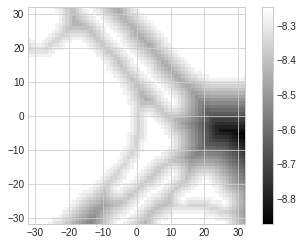

In [32]:
plt.imshow(dataset[10][8], cmap='gray', extent=[-32, 32, -32, 32])
plt.colorbar()

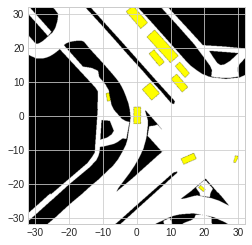

In [29]:
plt.imshow(dataset.get_scene_image(10), extent=[-32, 32, -32, 32])

In [6]:
import numpy as np
future = [5, 6, 7, 8, 9]
agent_mask = [True, False, True, True, True]

a = [future[i] for i in np.arange(len(agent_mask))[agent_mask]]
a

[5, 7, 8, 9]

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.497 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


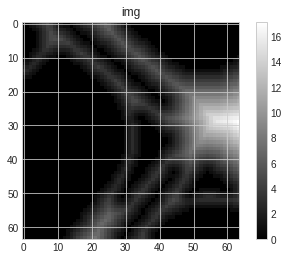

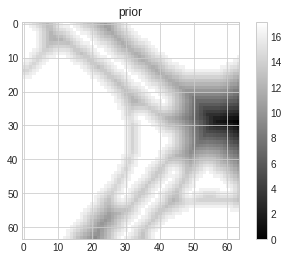

In [3]:
from pkyutils_ import NusTrajectoryExtractor

DATAROOT='/datasets/nuscene/v1.0-mini'
nus = NusTrajectoryExtractor(root=DATAROOT, version='v1.0-mini')

from nuscenes.eval.prediction.splits import get_prediction_challenge_split
import os
import matplotlib.pyplot as plt
import numpy as np

dataset_path = '/datasets/nuscene/v1.0-trainval_meta'
load_dir = '/home/q10/ws/repos/naverlabs2020/nus_dataset/cmu_dataset'

partition_tokens = get_prediction_challenge_split('mini_train', dataroot=dataset_path)
tokens_dict = {}
for token in partition_tokens:
    instance_token, sample_token = token.split('_')
    try:
        tokens_dict[sample_token].append(instance_token)
    except KeyError:
        tokens_dict[sample_token] = [instance_token]

sample_tokens = list(tokens_dict.keys())
sample_tk = sample_tokens[10]
instance_tks = tokens_dict[sample_tk]

sample_dir = os.path.join(load_dir, sample_tk)
scene_data = nus.get_cmu_annotation(instance_tks, sample_tk)

plt.title('img')
plt.imshow(scene_data['episode_img'][0], cmap='gray')
plt.colorbar()
plt.show()

plt.title('prior')
plt.imshow(scene_data['episode_img'][1], cmap='gray')
plt.colorbar()
plt.show()

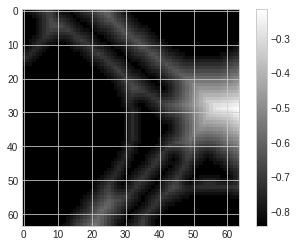

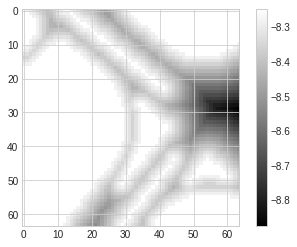

In [58]:
plt.imshow(scene_data['episode_img'][0][0], cmap='gray')
plt.colorbar()
plt.show()

plt.imshow(scene_data['episode_img'][1], cmap='gray')
plt.colorbar()
plt.show()

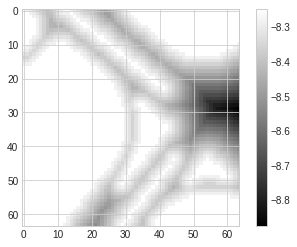

In [57]:
plt.imshow(scene_data['episode_img'][1], cmap='gray')
plt.colorbar()

In [1]:
from pkyutils_ import NusCustomDataset

dataset = NusCustomDataset(load_dir='../nus_dataset/cmu_dataset', split='mini_train', shuffle=False, min_angle=None, max_angle=None)

import:
pkyutils_
total samples: 187
total agents (to decode): 359
average curvature: -0.591829636894064 deg.
average speed: 5.242682051724221m
average future distance: 20.338468317724633m
average number of agents per scene: 1.9197860962566844


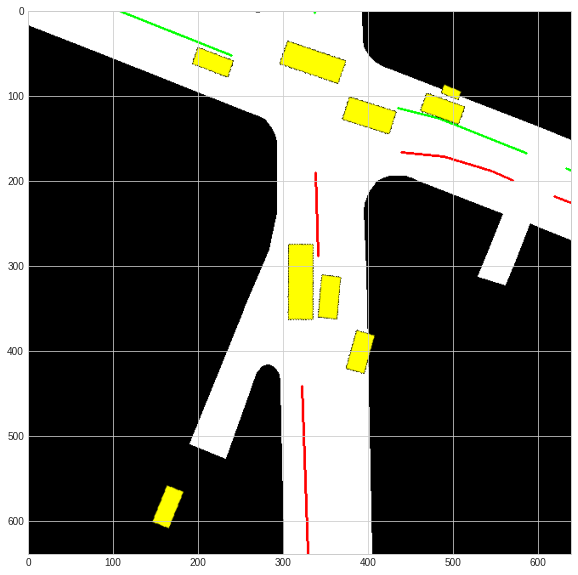

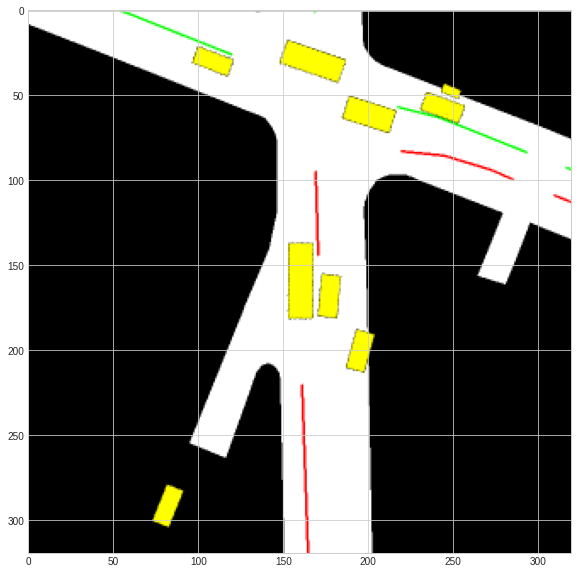

In [18]:
import cv2
import matplotlib.pyplot as plt

img = dataset.get_scene_image(90)
img_rs = cv2.resize(img, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(img_rs)
plt.show()

In [1]:
from pkyutils_ import NusCustomDataset

dataset = NusCustomDataset(load_dir='../nus_dataset/cmu_dataset', split='mini_train', shuffle=False, min_angle=None, max_angle=None)

import:
pkyutils_
total samples: 187
total agents (to decode): 359
average curvature: -0.591829636894064 deg.
average speed: 5.242682051724221m
average future distance: 20.338468317724633m
average number of agents per scene: 1.9197860962566844


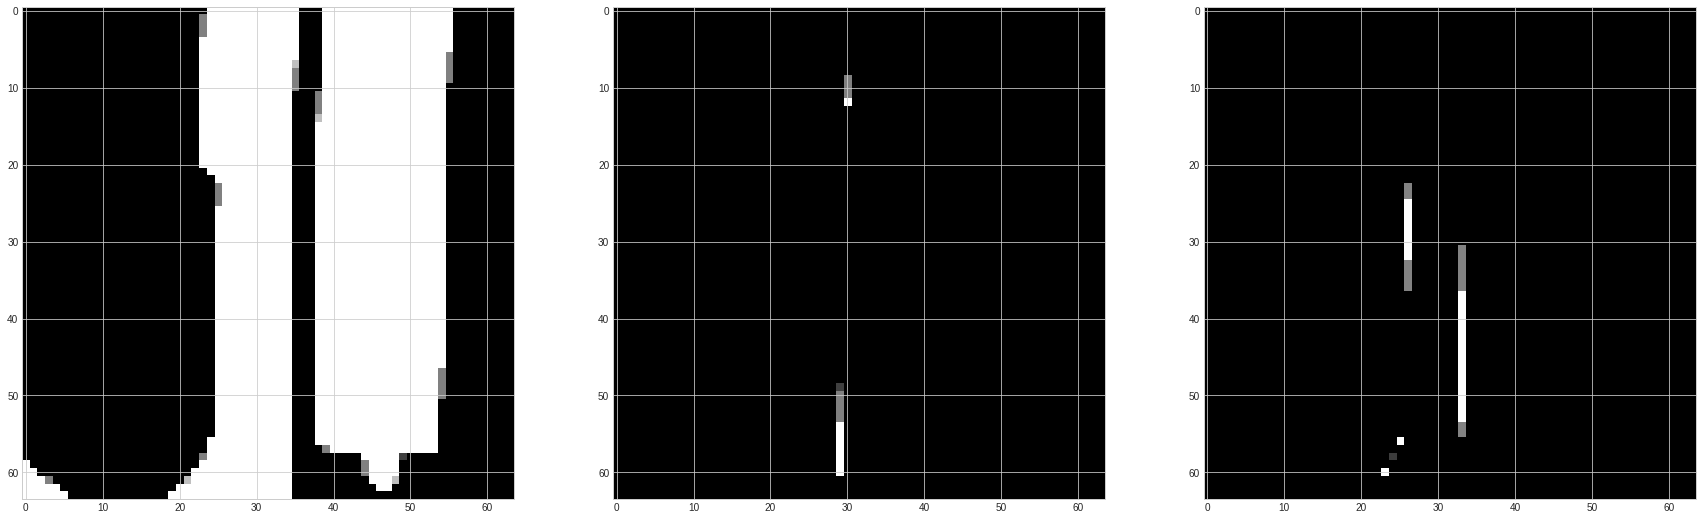

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

idx = 50
drivable_area, road_divider, lane_divider = dataset[idx]

plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.imshow(drivable_area, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(road_divider, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(lane_divider, cmap='gray')
plt.show()

In [10]:
drivable_area.shape, road_divider.shape

((64, 64), (64, 64))

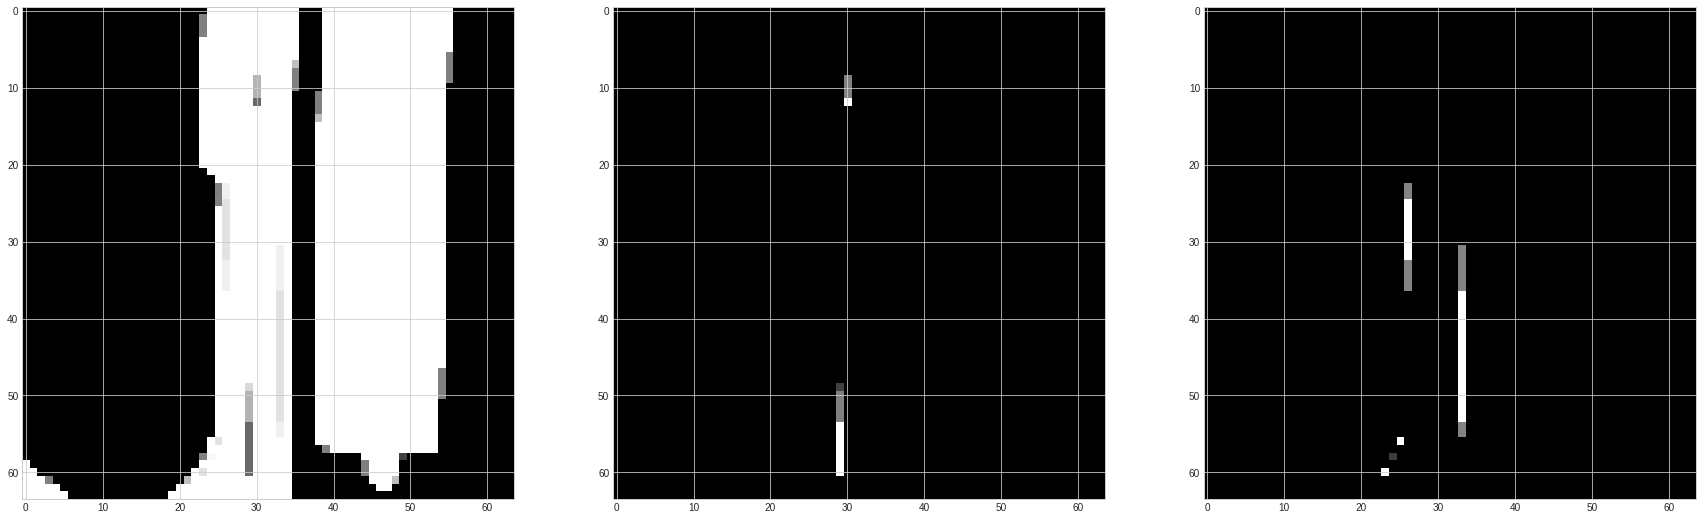

In [14]:
plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.imshow(drivable_area - road_divider - lane_divider, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(road_divider, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(lane_divider, cmap='gray')
plt.show()

In [ ]:
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

dist_transform = cv.distanceTransform(thresh, cv.DIST_L2, 5)
result = cv.normalize(dist_transform, None, 255, 0, cv.NORM_MINMAX, cv.CV_8UC1)

cv.imshow("dist_transform", result)
cv.imshow("src", img)

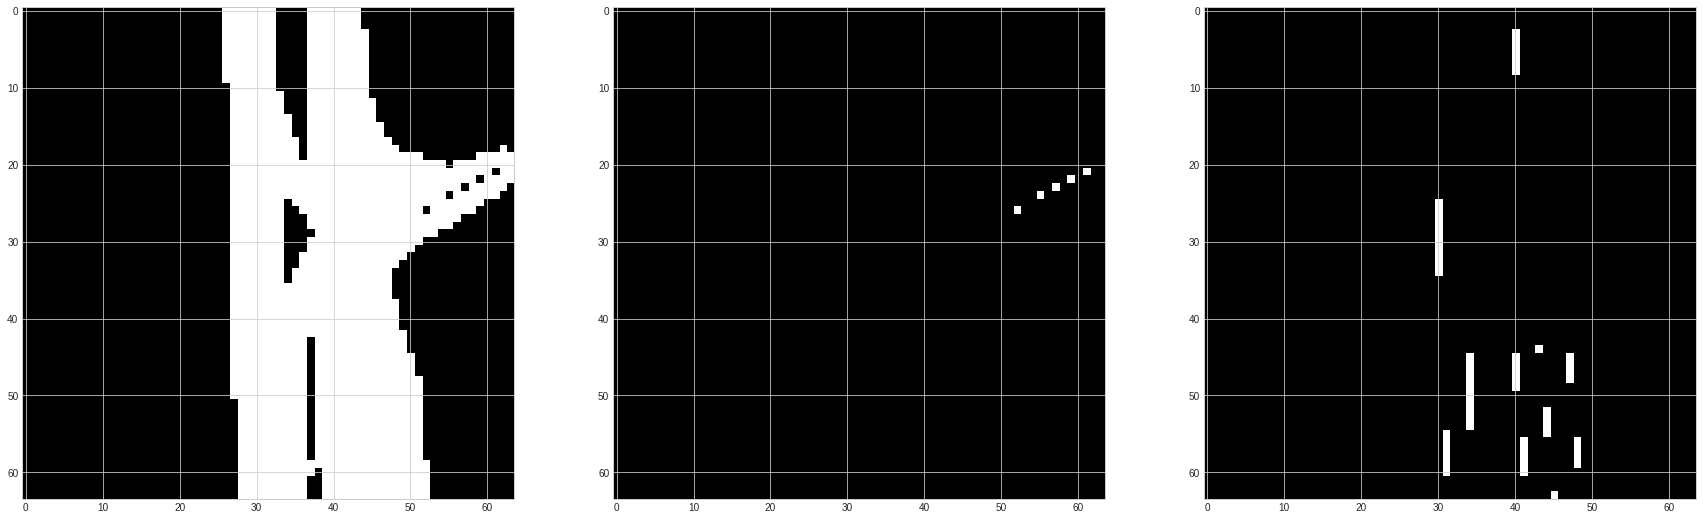

In [80]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

idx = 97
drivable_area, road_divider, lane_divider = dataset[idx]

_, drivable_area = cv2.threshold(drivable_area, 0, 255, cv2.THRESH_BINARY)
_, road_divider = cv2.threshold(road_divider, 0, 255, cv2.THRESH_BINARY)
_, lane_divider = cv2.threshold(lane_divider, 0, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.imshow(drivable_area - road_divider, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(road_divider, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(lane_divider, cmap='gray')
plt.show()

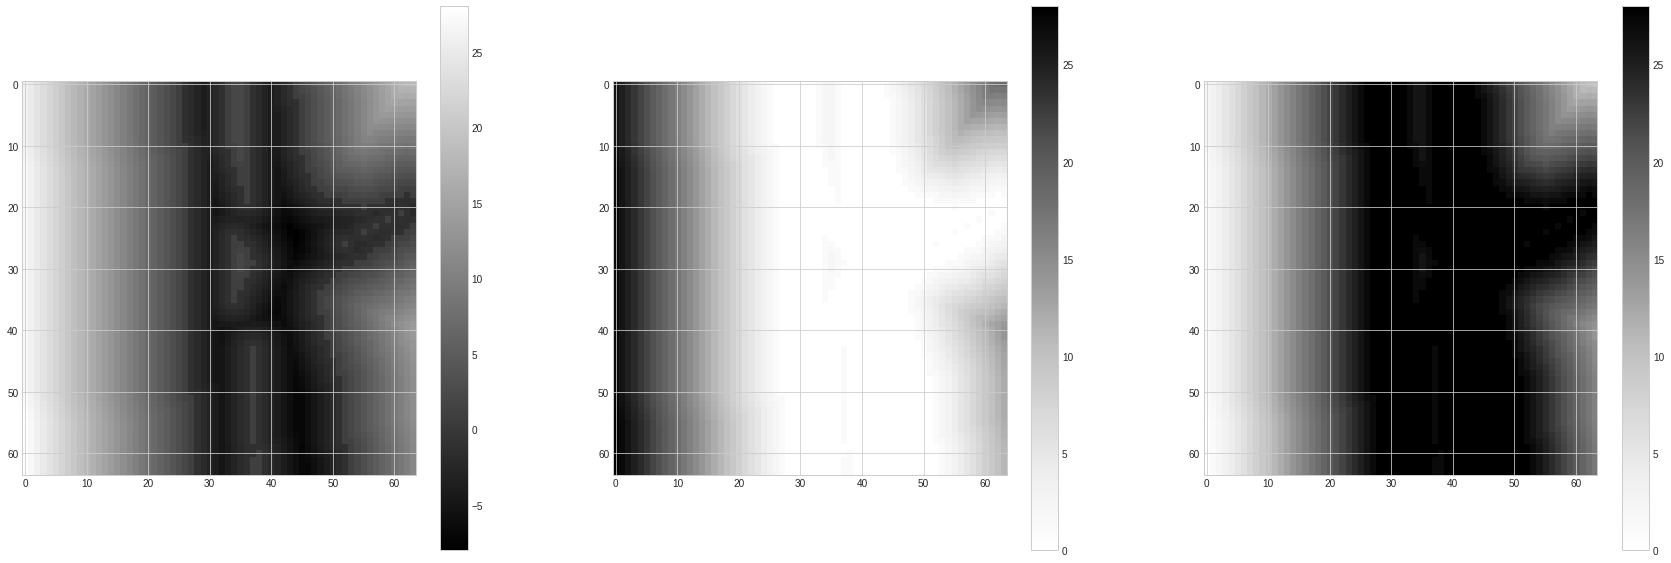

In [104]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

idx = 97
drivable_area, road_divider, lane_divider = dataset[idx]

_, drivable_area = cv2.threshold(drivable_area, 0, 255, cv2.THRESH_BINARY)
_, road_divider = cv2.threshold(road_divider, 0, 255, cv2.THRESH_BINARY)
drivable_area = drivable_area - road_divider

distance_map = cv2.distanceTransform(255 - drivable_area, cv2.DIST_L2, 5) - cv2.distanceTransform(drivable_area, cv2.DIST_L2, 5)
# distance_map = cv2.normalize(distance_map, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8UC1)
prior_map = distance_map.copy()
prior_map[prior_map < 0] = 0
# prior_map = prior_map.max() - prior_map

plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.imshow(distance_map, cmap='gray')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(prior_map)
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(prior_map.max() - prior_map)
plt.colorbar()

In [109]:
np.sqrt(np.var(prior_map))

8.203889

In [3]:
from pkyutils_ import NusCustomDataset
import numpy as np
import matplotlib.pyplot as plt

dataset = NusCustomDataset(load_dir='../nus_dataset/cmu_dataset', split='train', shuffle=False, min_angle=None, max_angle=None)
dataset.calculate_dataset_distribution()

total samples: 9618
total agents (to decode): 17425
average curvature: 0.14498181660264156 deg.
average speed: 3.645412809385256m
average future distance: 14.222755820998794m
average number of agents per scene: 1.8117072156373466
[train] img: 5.523284961778879 (8.281441917646587), prior: 20.201721037055197 (7.178861002251169)


(5.523284961778879, 8.281441917646587, 20.201721037055197, 7.178861002251169)

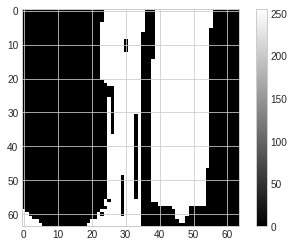

In [47]:
plt.imshow(thresh, cmap='gray')
plt.colorbar()

In [22]:
thresh

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [38]:
dist_transform = cv2.distanceTransform(drivable_area - road_divider - lane_divider, cv2.DIST_L2, 5)
result = cv2.normalize(dist_transform, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8UC1)

In [39]:
dist_transform.shape, result.shape

((64, 64), (64, 64))

In [40]:
dist_transform, result

(array([[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        ...,
        [2.1969, 1.4   , 1.    , ..., 0.    , 0.    , 0.    ],
        [2.8   , 2.1969, 2.    , ..., 0.    , 0.    , 0.    ],
        [3.5969, 3.1969, 2.8   , ..., 0.    , 0.    , 0.    ]],
       dtype=float32),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [ 62,  40,  28, ...,   0,   0,   0],
        [ 79,  62,  57, ...,   0,   0,   0],
        [102,  91,  79, ...,   0,   0,   0]], dtype=uint8))

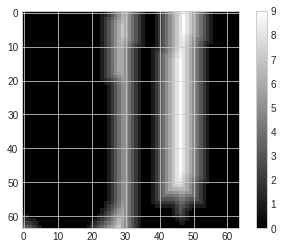

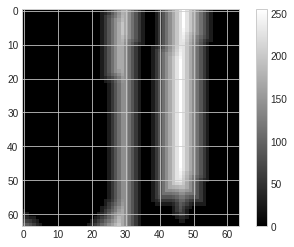

In [41]:
plt.imshow(dist_transform, cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(result, cmap='gray')
plt.colorbar()
plt.show()

In [50]:
np.max(drivable_area - road_divider - lane_divider)

255

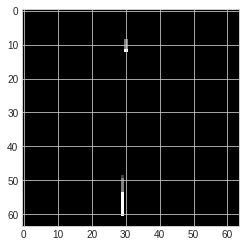

In [53]:
plt.imshow(road_divider, cmap='gray')

In [ ]:
'''
data = (
            past, past_len,
            [future[i] for i in np.arange(len(agent_mask))[agent_mask]],
            [future_len[i] for i in np.arange(len(agent_mask))[agent_mask]],
            agent_mask, vel, pos, image, prior, sample_tk
        )
'''

In [1]:
from pkyutils_ import NusCustomDataset
import numpy as np
import matplotlib.pyplot as plt
import cv2

dataset = NusCustomDataset(load_dir='../nus_dataset/cmu_dataset', split='mini_train', shuffle=False, min_angle=None, max_angle=None)

import:
pkyutils_
total samples: 187
total agents (to decode): 359
average curvature: -0.59 deg.
average speed: 5.24m
average future distance: 20.34m
average number of agents per scene: 1.92


In [2]:
print(dataset[i][4])
mask = dataset[i][4]
pose = np.array(dataset[i][6])[mask]
pose_all = np.array(dataset[i][6])
plt.imshow(dataset.get_scene_image(i), extent=[-32, 32, -32, 32])
plt.scatter(pose_all[:, 0], pose_all[:, 1], color='r')
plt.scatter(pose[:, 0], pose[:, 1])
plt.show()

NameError: name 'i' is not defined

In [42]:
np.array(future)

array([[[-0.23767896,  1.9384831 ],
        [-0.67519003,  3.70851701],
        [-1.33398788,  5.4720576 ],
        [-2.19429482,  7.10782071],
        [-3.11294353,  8.7071251 ],
        [-4.09952047, 10.0939989 ]]])

In [41]:
np.append(decoded_agent_pose, np.array(future), axis=0)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

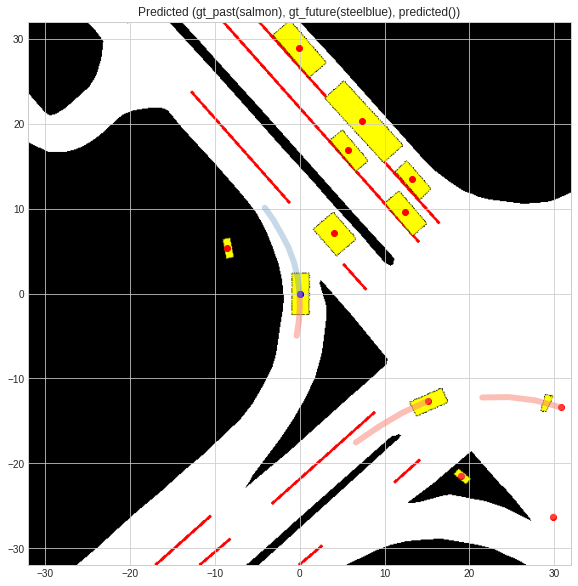

In [3]:
idx = 10

scene_size = (64, 64)
w, h = scene_size

past, past_len, future, future_len, agent_mask, vel, pos, image, prior, sample_tk = dataset[idx]

scene_img = dataset.get_scene_image_with_idx(idx)

total_agent_pose = np.array(pos).reshape(-1, 2)
decoded_agent_pose = (np.array(pos)[agent_mask]).reshape(-1, 2)

plt.figure(figsize=(10, 10))
plt.title("Predicted (gt_past(salmon), gt_future(steelblue), predicted())")
plt.imshow(scene_img, extent=[-h//2, h//2, -w//2, w//2])

plt.scatter(total_agent_pose[:, 0], total_agent_pose[:, 1], color='r')
plt.scatter(decoded_agent_pose[:, 0], decoded_agent_pose[:, 1], color='b')

for gt_past in np.array(past):
    plt.plot(gt_past[:, 0], gt_past[:, 1], color='salmon', alpha=0.5, linewidth=6)

for gt_future, gt_pose in zip(np.array(future), decoded_agent_pose):
    plt.plot(np.append(gt_pose[0], gt_future[:, 0]), np.append(gt_pose[1], gt_future[:, 1]),
             color='steelblue', alpha=0.3, linewidth=6)

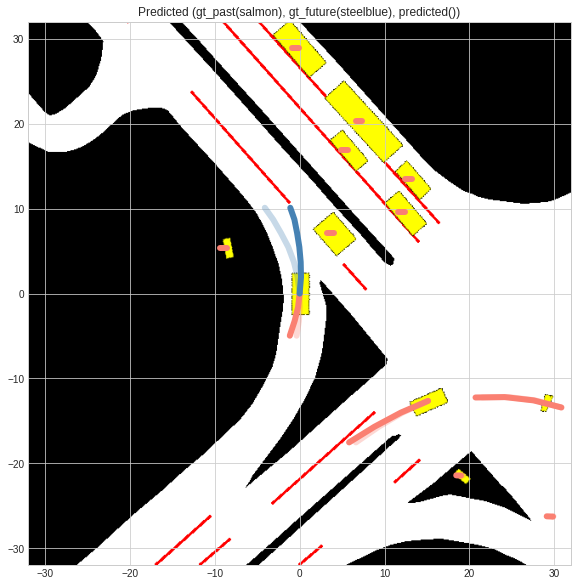

In [30]:
idx = 10

scene_size = (64, 64)
w, h = scene_size

past, past_len, future, future_len, agent_mask, vel, pos, image, prior, sample_tk = dataset[idx]

scene_img = dataset.get_scene_image_with_idx(idx)

total_agent_pose = np.array(pos).reshape(-1, 2)
decoded_agent_pose = (np.array(pos)[agent_mask]).reshape(-1, 2)

plt.figure(figsize=(10, 10))
plt.title("Predicted (gt_past(salmon), gt_future(steelblue), predicted())")
plt.imshow(scene_img, extent=[-h//2, h//2, -w//2, w//2])

# plt.scatter(total_agent_pose[:, 0], total_agent_pose[:, 1], color='r')
# plt.scatter(decoded_agent_pose[:, 0], decoded_agent_pose[:, 1], color='b')

for gt_past in np.array(past):
    plt.plot(gt_past[:, 0], gt_past[:, 1], color='salmon', linewidth=6, alpha=0.3)
for gt_past in np.array(past):
    plt.plot(gt_past[:, 0]+np.array([-0.8, -0.5, -0.2, 0.]), gt_past[:, 1], color='salmon', linewidth=6)

for gt_future, gt_pose in zip(np.array(future), decoded_agent_pose):
    plt.plot(np.append(gt_pose[0], gt_future[:, 0]), np.append(gt_pose[1], gt_future[:, 1]),
             color='steelblue', linewidth=6, alpha=0.3)
for gt_future, gt_pose in zip(np.array(future), decoded_agent_pose):
    plt.plot(np.append(gt_pose[0], gt_future[:, 0])+np.array([0., 0.4, 0.8, 1.3, 1.9, 2.5, 3.0]), np.append(gt_pose[1], gt_future[:, 1]),
             color='steelblue', linewidth=6)

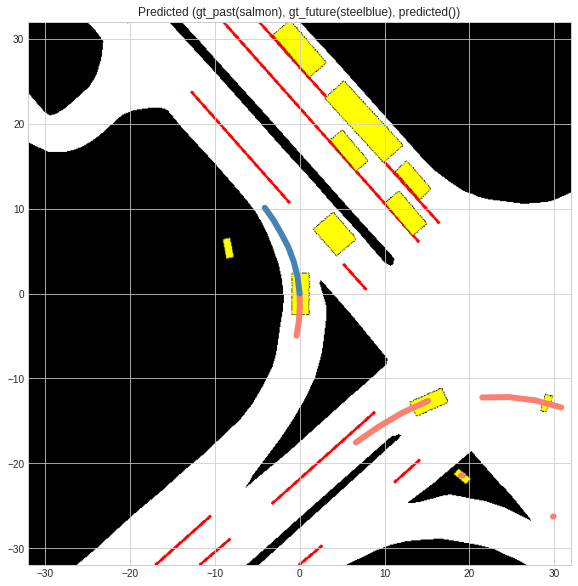

In [33]:
idx = 10

scene_size = (64, 64)
w, h = scene_size

past, past_len, future, future_len, agent_mask, vel, pos, image, prior, sample_tk = dataset[idx]

scene_img = dataset.get_scene_image_with_idx(idx)

total_agent_pose = np.array(pos).reshape(-1, 2)
decoded_agent_pose = (np.array(pos)[agent_mask]).reshape(-1, 2)

plt.figure(figsize=(10, 10))
plt.title("Predicted (gt_past(salmon), gt_future(steelblue), predicted())")
plt.imshow(scene_img, extent=[-h//2, h//2, -w//2, w//2])

for gt_past in np.array(past):
    plt.plot(gt_past[:, 0], gt_past[:, 1], color='salmon',linewidth=6)

for gt_future, gt_pose in zip(np.array(future), decoded_agent_pose):
    plt.plot(np.append(gt_pose[0], gt_future[:, 0]), np.append(gt_pose[1], gt_future[:, 1]),
             color='steelblue', linewidth=6)

In [4]:
for idx in range(len(dataset)):
    data = dataset[idx]
    pass

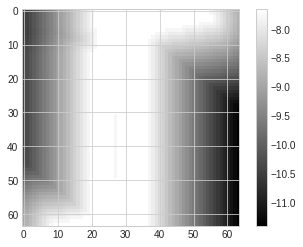

In [15]:
import matplotlib.pyplot as plt

plt.imshow(dataset[3][-2], cmap='gray')
plt.colorbar()

In [13]:
import numpy as np

dataset[3][-2][0].sum()

tensor(-528.0185)

In [16]:
len(dataset)

9618